# Gradient Decent for Linear Regression with Multiple Variables and Machine Learning


Just going to playing around with some more machine learning concepts. This time I will be using the California Housing Data set. I will be using the gradient decent algorithm to find the best fit line for the data. I will also be using the scikit-learn library to compare my results to the results of the library.

#### What is Gradient Decent?
Gradient Decent is an algorithm that is used to find the best fit line for a set of data. It is used in machine learning to find the best fit line for a set of data. It is also used in neural networks to find the best weights for the network.

What is the best fit line? The best fit line is the line that has the least amount of error. The error is the distance between the line and the data points. The best fit line is also known as the line of best fit or the regression line.

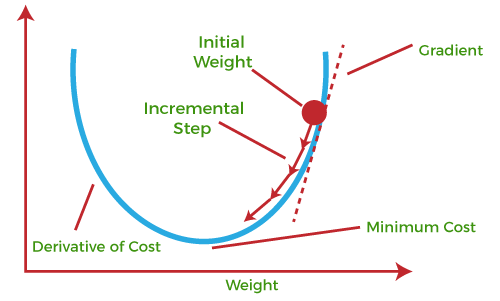

#### Think of it like this: 
A ball is rolling down a slope. The ball is trying to find the lowest point on the slope. The ball is the gradient decent algorithm. The slope is the error. The lowest point on the slope is the best fit line, we are trying to find the best line that has the least amount of error, for our Machine learning applications

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy as sp
import math 


In [8]:
# Loading the data into a pandas dataframe

df = pd.read_csv(r'C:\Users\user\Math_Github\Back_Prop\Data\Cali_Housing_data.csv')

#removing the null values 
df = df.dropna()

df 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Feature Scaling

### Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [9]:
# Select the columns you want to scale
columns_to_scale = ['total_rooms', 'total_bedrooms', 'median_income', 'households', 'population']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the selected columns
scaler.fit(df[columns_to_scale])

# Transform the selected columns to perform scaling
df[columns_to_scale] = scaler.transform(df[columns_to_scale])

## Gradient Descent with NumPy (Target = Median House Value)


Gradient Descent is used and will be used to minimize the cost function of a model. The cost function is the difference between the predicted value and the actual value. The goal is to minimize the cost function to get the best fit line for the data.

In [10]:
# Define the features and target variable
X = df[columns_to_scale].values
y = df['median_house_value'].values

# Add a column of ones as the intercept term
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Define the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000

# Initialize the parameters
theta = np.zeros(X.shape[1])

# Perform gradient descent
for i in range(num_iterations):
    # Calculate the predicted values
    predictions = np.dot(X, theta)

    # Calculate the error
    error = predictions - y

    # Update the parameters using gradient descent
    theta = theta - (learning_rate / X.shape[0]) * np.dot(X.T, error)

# Print the learned parameters
print("Learned Parameters:")
print(theta)


Learned Parameters:
[206855.48256043 -16203.20681823  20309.8771088   82146.67119515
  27186.07444389 -30655.15438956]


In [16]:
# Define the features and target variable
X = df[columns_to_scale].values
y = df['median_house_value'].values

# Add a column of ones as the intercept term
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Define the learning rate and number of iterations
learning_rate = 0.02
num_iterations = 1000

# Initialize the parameters
theta = np.zeros(X.shape[1])

# Perform gradient descent
for i in range(num_iterations):
    # Calculate the predicted values
    predictions = np.dot(X, theta)

    # Calculate the error
    error = predictions - y

    # Update the parameters using gradient descent
    theta = theta - (learning_rate / X.shape[0]) * np.dot(X.T, error)

# Print the learned parameters
print("Learned Parameters:")
print(theta)

Learned Parameters:
[206864.41280704 -33484.21013883  29514.42603319  85688.29897985
  41593.27942234 -37919.13232575]


## We then Run A x and y test to check the accuracy of the model

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Extract the features from the test dataset
X_test = df[columns_to_scale].values

# Add a column of ones as the intercept term
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

# Extract the true target variable from the test dataset
y_test = df['median_house_value'].values

# Make predictions on the test dataset using the learned parameters 'theta'
y_test_pred = np.dot(X_test, theta)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)



Mean Squared Error (MSE): 6302756648.755372
Root Mean Squared Error (RMSE): 79389.90268765527
Mean Absolute Error (MAE): 59008.61602832033
R-squared (R2) Score: 0.5269884339830188


### You can continue to run these tests over and over to make sure that the model is accurate. You are also able to redefine the adat even futher. The best way to tweak a data set is to continue to run test, and then emplement them into a model such as Pytorch or Tensorflow. You can even use some of the SciKit Learn models to test the data, and explore where your model gets confused, where the best results are located, and where the worst results are located.